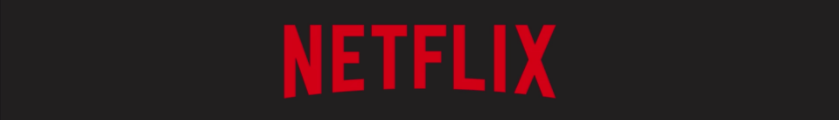

# Jupyter 3

In [1]:
import pandas as pd
import numpy as np
import tratamento_ausentes as ta

In [2]:
df = pd.read_csv('netflix_dfv2.csv', sep = ',')

In [3]:
# Ao ser carregado, os valores NA são lidos como NaN. Porém no arquivo csv está como NA.

df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,day_added,year_added,qtd_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,25.0,2021.0,0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24.0,2021.0,2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,24.0,2021.0,1
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,24.0,2021.0,1
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,24.0,2021.0,2


# Aplicando transformações

In [4]:
df.year_added.unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2009., 2008., 9999., 2010.])

In [5]:
df.day_added.unique()

array([25., 24., 23., 22., 21., 20., 19., 17., 16., 15., 14., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 31., 29., 28., 27.,
       26., 18., 13., 12., 30., 99.])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          8807 non-null   object 
 1   title         8807 non-null   object 
 2   director      6173 non-null   object 
 3   cast          7982 non-null   object 
 4   country       7976 non-null   object 
 5   release_year  8807 non-null   int64  
 6   rating        8800 non-null   object 
 7   duration      8807 non-null   int64  
 8   listed_in     8807 non-null   object 
 9   description   8807 non-null   object 
 10  month_added   8797 non-null   object 
 11  day_added     8807 non-null   float64
 12  year_added    8807 non-null   float64
 13  qtd_seasons   8807 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 963.4+ KB


In [7]:
df['year_added'] = df['year_added'].astype("int64")

In [8]:
df['day_added'] = df['day_added'].astype("int64") 

In [9]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,day_added,year_added,qtd_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,25,2021,0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24,2021,2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,24,2021,1
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,24,2021,1
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,24,2021,2


## Removendo todo e qualquer espaço em branco no início da string

<blockquote> Espaços em branco causam muitos erros ao longo do projeto </blockquote>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   release_year  8807 non-null   int64 
 6   rating        8800 non-null   object
 7   duration      8807 non-null   int64 
 8   listed_in     8807 non-null   object
 9   description   8807 non-null   object
 10  month_added   8797 non-null   object
 11  day_added     8807 non-null   int64 
 12  year_added    8807 non-null   int64 
 13  qtd_seasons   8807 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 963.4+ KB


In [11]:
df['title'] = df['title'].str.lstrip()

In [12]:
df['director'] = df['director'].str.lstrip()

In [13]:
df['cast'] = df['cast'].str.lstrip()

In [14]:
df['listed_in'] = df['listed_in'].str.lstrip()

In [15]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,day_added,year_added,qtd_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,25,2021,0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24,2021,2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,24,2021,1
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,24,2021,1
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,24,2021,2


In [16]:
ta.func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 14 colunas.
Encontrado: 5 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
director,2634,29.91,object
country,831,9.44,object
cast,825,9.37,object
month_added,10,0.11,object
rating,7,0.08,object


<blockquote> Definindo os NA's por extenso </blockquote>

In [17]:
ta.fix_missing_value(df,'director', 'Not Available')

2634 valores ausentes na coluna director foram substituídos por Not Available.


0       Kirsten Johnson
1         Not Available
2       Julien Leclercq
3         Not Available
4         Not Available
             ...       
8802      David Fincher
8803      Not Available
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [18]:
ta.fix_missing_value(df,'cast', 'Not Available')

825 valores ausentes na coluna cast foram substituídos por Not Available.


0                                           Not Available
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                           Not Available
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                        Not Available
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [19]:
ta.fix_missing_value(df,'country', 'Not Available')

831 valores ausentes na coluna country foram substituídos por Not Available.


0       United States
1        South Africa
2       Not Available
3       Not Available
4               India
            ...      
8802    United States
8803    Not Available
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [20]:
ta.fix_missing_value(df,'rating', 'Not Available')

7 valores ausentes na coluna rating foram substituídos por Not Available.


0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [21]:
ta.fix_missing_value(df,'month_added', 'Not Available')

10 valores ausentes na coluna month_added foram substituídos por Not Available.


0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: month_added, Length: 8807, dtype: object

In [22]:
ta.func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 14 colunas.
Encontrado: 0 colunas que têm valores ausentes.


In [23]:
df.head(8)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,day_added,year_added,qtd_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,25,2021,0
1,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24,2021,2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,24,2021,1
3,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021,TV-MA,0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,24,2021,1
4,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,24,2021,2
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Available,2021,TV-MA,0,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September,24,2021,1
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Not Available,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September,24,2021,0
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,24,2021,0


In [28]:
# Salvando o dataframe para continuar o projeto posteriormente.
df.to_csv('netflix_dfv3.csv', index = False)